# Range Estimation in Radar using Maximum Likelihood Estimator
Based on *Range Estimation in Radar using Maximum Likelihood Estimator*, H. Sadia et.al.

In [1]:
import numpy as np
import plotly.express as px

In [2]:
num_samples = 100
t = np.arange(num_samples)

In [10]:
tx_period = 25
tx_freq = 1/tx_period
x = np.cos(2*np.pi*tx_freq*t)

Generate transmit cosine (Fig. 3 in paper)

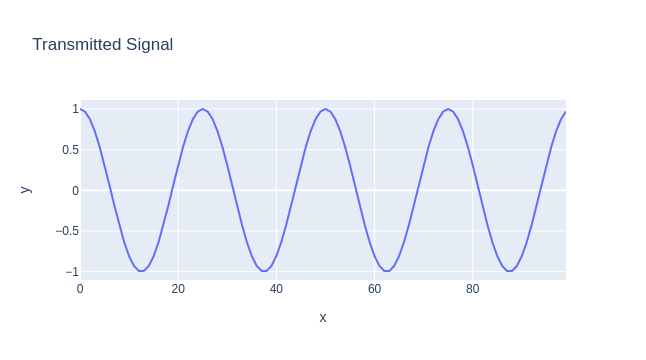

In [11]:
tx_waveform_fig = px.line(x=t, y=x, title="Transmitted Signal")
tx_waveform_fig.show()

In [169]:
rx_delay_samples = 5
y = np.cos(2*np.pi*tx_freq*t + rx_delay_samples)

Generate recieved cosing (Fig. 4 in paper)

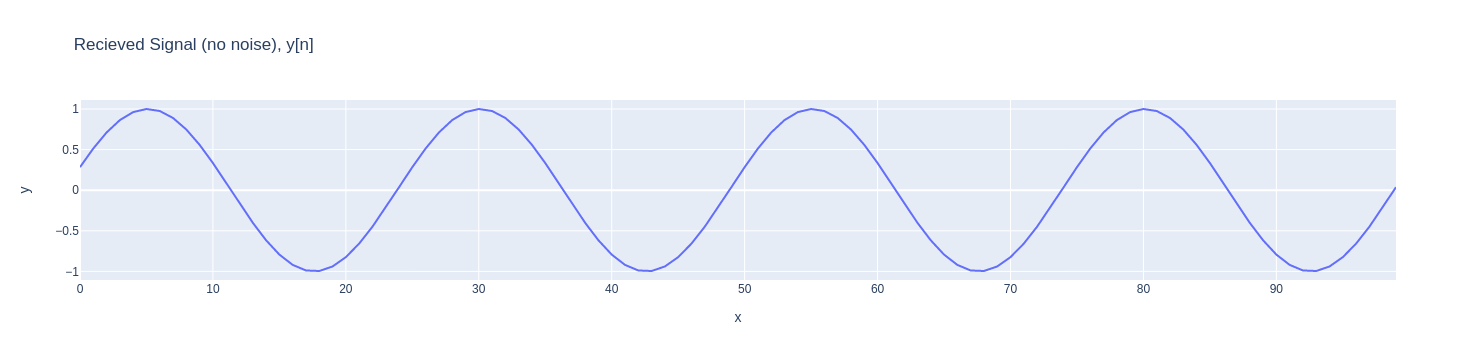

In [170]:
fig = px.line(x=t, y=y, title="Recieved Signal (no noise), y[n]")
fig.show()

In [171]:
awgn = np.random.normal(0, 0.2, num_samples)
y_awgn = y + awgn

Add AWGN to recieved signal (Fig. 5 in paper)

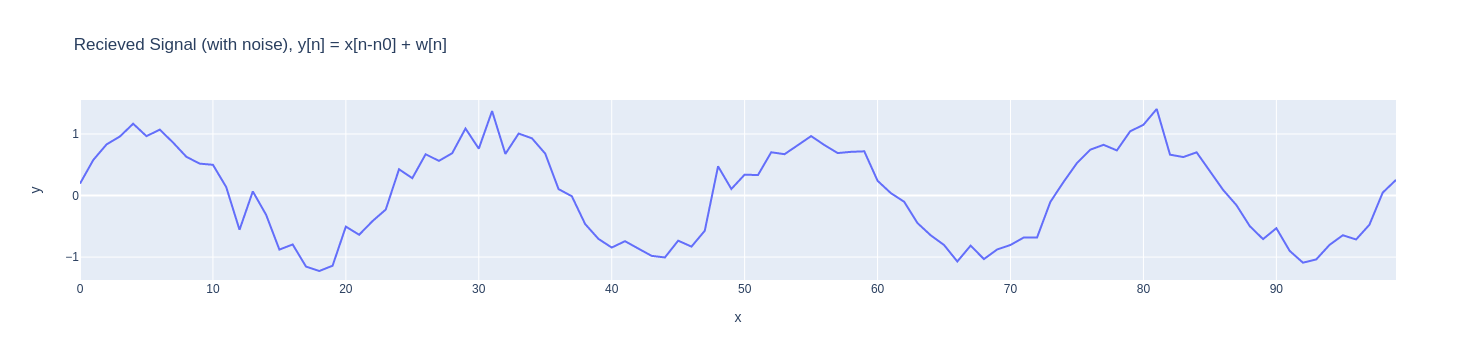

In [172]:
fig = px.line(x=t, y=y_awgn, title="Recieved Signal (with noise), y[n] = x[n-n0] + w[n]")
fig.show()

In [173]:
corr = np.correlate(x, y_awgn, mode="full")
corr_t = np.arange(len(corr))

Correlation `corr` is equivalent to the $z[n]$ in the paper.

$z[n] = \sum_{n=n_0}^{n_0+M-1} y[n]\cos(\omega_0(n-n_0))$

This is equivalent to cross-correlation, as we are multiplying a signal $y[n]$ with another shifting signal $\cos(\omega_0(n-n_0))$

This should be equivalent to Fig. 6 and Fig. 7 in paper.

In [ ]:
fig = px.line(x=corr_t, y=corr, title="Correlation, z[n]")
fig.show()

In [175]:
max_corr = np.argmax(corr)
print("argmax z[n]:", max_corr)
print("Estimated delay:", 99 - max_corr)

argmax z[n]: 94
Estimated delay: 5


In the paper, they recieve a result of max_corr = 100 - delay.

We get max_corr = 99 - delay. I am assuming this is due to MATLAB (used in paper) having 1-indexing??